In [65]:
# Import necessary needed packages/Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [67]:
#Get the Dataset.
dataset = pd.read_csv('../project/salaries.csv')
dataset.head(50)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [69]:
# dropping the column
dataset = dataset.drop(['employee_residence'], axis = 1)
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,100,CA,M


In [71]:
# dropping the column.
dataset = dataset.drop(['salary_currency'], axis = 1)
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,120000,100,CA,M


In [73]:
# check the null values. 
dataset.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [75]:
# getting table information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   job_title         3755 non-null   object
 4   salary            3755 non-null   int64 
 5   salary_in_usd     3755 non-null   int64 
 6   remote_ratio      3755 non-null   int64 
 7   company_location  3755 non-null   object
 8   company_size      3755 non-null   object
dtypes: int64(4), object(5)
memory usage: 264.2+ KB


In [77]:
dataset['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [ ]:
# getting value counts

In [79]:
dataset['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [81]:
dataset['employment_type'].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [83]:
dataset['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [85]:
dataset['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [87]:
# Alternative/ Manual way of converting String values.
'''job_title_stat = {'Principal Data Scientist':0,'ML Engineer':1, 'Data Scientist':2,
 'Applied Scientist':3, 'Data Analyst':4, 'Data Modeler':5, 'Research Engineer':6,
 'Analytics Engineer':7, 'Business Intelligence Engineer':8,
 'Machine Learning Engineer':9, 'Data Strategist':10, 'Data Engineer':11,
 'Computer Vision Engineer':12, 'Data Quality Analyst':13,
 'Compliance Data Analyst':14, 'Data Architect':15,
 'Applied Machine Learning Engineer':16, 'AI Developer':17, 'Research Scientist':18,
 'Data Analytics Manager':19, 'Business Data Analyst':20, 'Applied Data Scientist':21,
 'Staff Data Analyst':22, 'ETL Engineer':23, 'Data DevOps Engineer':24, 'Head of Data':25,
 'Data Science Manager':26, 'Data Manager':27, 'Machine Learning Researcher':28,
 'Big Data Engineer':29, 'Data Specialist':30, 'Lead Data Analyst':31,
 'BI Data Engineer':32, 'Director of Data Science':33,
 'Machine Learning Scientist':34, 'MLOps Engineer':35, 'AI Scientist':36,
 'Autonomous Vehicle Technician':37, 'Applied Machine Learning Scientist':38,
 'Lead Data Scientist':39, 'Cloud Database Engineer':40, 'Financial Data Analyst':41,
 'Data Infrastructure Engineer':42, 'Software Data Engineer':43, 'AI Programmer':44,
 'Data Operations Engineer':45, 'BI Developer':46, 'Data Science Lead':47,
 'Deep Learning Researcher':48, 'BI Analyst':49, 'Data Science Consultant':50,
 'Data Analytics Specialist':51, 'Machine Learning Infrastructure Engineer':52,
 'BI Data Analyst':53, 'Head of Data Science':54, 'Insight Analyst':55,
 'Deep Learning Engineer':56, 'Machine Learning Software Engineer':57,
 'Big Data Architect':58, 'Product Data Analyst':59,
 'Computer Vision Software Engineer':60, 'Azure Data Engineer':61,
 'Marketing Data Engineer':62, 'Data Analytics Lead':63, 'Data Lead':64,
 'Data Science Engineer':65, 'Machine Learning Research Engineer':66,
 'NLP Engineer':67, 'Manager Data Management':68, 'Machine Learning Developer':69,
 '3D Computer Vision Researcher':70, 'Principal Machine Learning Engineer':71,
 'Data Analytics Engineer':72, 'Data Analytics Consultant':73,
 'Data Management Specialist':74, 'Data Science Tech Lead':75,
 'Data Scientist Lead':76, 'Cloud Data Engineer':77, 'Data Operations Analyst':78,
 'Marketing Data Analyst':79, 'Power BI Developer':80, 'Product Data Scientist':81,
 'Principal Data Architect':82, 'Machine Learning Manager':83,
 'Lead Machine Learning Engineer':84, 'ETL Developer':85, 'Cloud Data Architect':86,
 'Lead Data Engineer':87, 'Head of Machine Learning':88, 'Principal Data Analyst':89,
 'Principal Data Engineer':90, 'Staff Data Scientist':91, 'Finance Data Analyst':92}
experience_lev_stat = {'SE':0,'MI':1,'EN':2,'EX':3}
emp_type_stat = {'FT':0,'PT':1,'CT':2,'FL':3}
com_size_stat = {'M':0,'L':1,'S':2}
com_loc_stat = {'ES':0, 'US':1, 'CA':2, 'DE':3, 'GB':4, 'NG':5, 'IN':6, 'HK':7, 'NL':8, 'CH':9, 'CF':10,
       'FR':11, 'FI':12, 'UA':13, 'IE':14, 'IL':15, 'GH':16, 'CO':17, 'SG':18, 'AU':19, 'SE':20, 'SI':21,
       'MX':22, 'BR':23, 'PT':24, 'RU':25, 'TH':26, 'HR':27, 'VN':28, 'EE':29, 'AM':30, 'BA':31, 'KE':32,
       'GR':33, 'MK':34, 'LV':35, 'RO':36, 'PK':37, 'IT':38, 'MA':39, 'PL':40, 'AL':41, 'AR':42, 'LT':43,
       'AS':44, 'CR':45, 'IR':46, 'BS':47, 'HU':48, 'AT':49, 'SK':50, 'CZ':51, 'TR':52, 'PR':53, 'DK':54,
       'BO':55, 'PH':56, 'BE':57, 'ID':58, 'EG':59, 'AE':60, 'LU':61, 'MY':62, 'HN':63, 'JP':64, 'DZ':65,
       'IQ':66, 'CN':67, 'NZ':68, 'CL':69, 'MD':70, 'MT':71}'''

"job_title_stat = {'Principal Data Scientist':0,'ML Engineer':1, 'Data Scientist':2,\n 'Applied Scientist':3, 'Data Analyst':4, 'Data Modeler':5, 'Research Engineer':6,\n 'Analytics Engineer':7, 'Business Intelligence Engineer':8,\n 'Machine Learning Engineer':9, 'Data Strategist':10, 'Data Engineer':11,\n 'Computer Vision Engineer':12, 'Data Quality Analyst':13,\n 'Compliance Data Analyst':14, 'Data Architect':15,\n 'Applied Machine Learning Engineer':16, 'AI Developer':17, 'Research Scientist':18,\n 'Data Analytics Manager':19, 'Business Data Analyst':20, 'Applied Data Scientist':21,\n 'Staff Data Analyst':22, 'ETL Engineer':23, 'Data DevOps Engineer':24, 'Head of Data':25,\n 'Data Science Manager':26, 'Data Manager':27, 'Machine Learning Researcher':28,\n 'Big Data Engineer':29, 'Data Specialist':30, 'Lead Data Analyst':31,\n 'BI Data Engineer':32, 'Director of Data Science':33,\n 'Machine Learning Scientist':34, 'MLOps Engineer':35, 'AI Scientist':36,\n 'Autonomous Vehicle Technici

In [89]:
# Alternative/ Manual way of converting String values.
'''dataset['job_title'] = dataset['job_title'].replace(job_title_stat)
dataset['experience_level'] = dataset['experience_level'].replace(experience_lev_stat)
dataset['employment_type'] = dataset['employment_type'].replace(emp_type_stat)
dataset['company_size'] = dataset['company_size'].replace(com_size_stat)
dataset['company_location'] = dataset['company_location'].replace(com_loc_stat)'''

"dataset['job_title'] = dataset['job_title'].replace(job_title_stat)\ndataset['experience_level'] = dataset['experience_level'].replace(experience_lev_stat)\ndataset['employment_type'] = dataset['employment_type'].replace(emp_type_stat)\ndataset['company_size'] = dataset['company_size'].replace(com_size_stat)\ndataset['company_location'] = dataset['company_location'].replace(com_loc_stat)"

In [92]:
# coverting string values using LabelEncoder.
columns =  [colum for colum in dataset.columns if dataset[colum].dtype=='object']
le = LabelEncoder()
for colum in columns:
    dataset[colum] = le.fit_transform(dataset[colum])

In [94]:
# dropping the column
dataset = dataset.drop(['remote_ratio'], axis = 1)

In [96]:
dataset.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,company_location,company_size
count,3755.000000,3755.000000,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000
mean,2022.373635,2.469241,1.996538,39.661784,1.906956e+05,137570.389880,62.117177,0.918509
std,0.691448,0.906261,0.133550,18.536695,6.716765e+05,63055.625278,17.495432,0.392071
min,2020.000000,0.000000,0.000000,0.000000,6.000000e+03,5132.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,27.000000,1.000000e+05,95000.000000,70.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,1.380000e+05,135000.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,1.800000e+05,175000.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,3.040000e+07,450000.000000,71.000000,2.000000


In [98]:
# Splitting the dataset into two parts as features and label.
x = dataset[['experience_level','employment_type','company_size','job_title','company_location']]
y =  dataset['salary_in_usd']

In [100]:
# Splitting dataset into test/train data.
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size = 0.2, random_state=42)

In [102]:
# Regressor model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

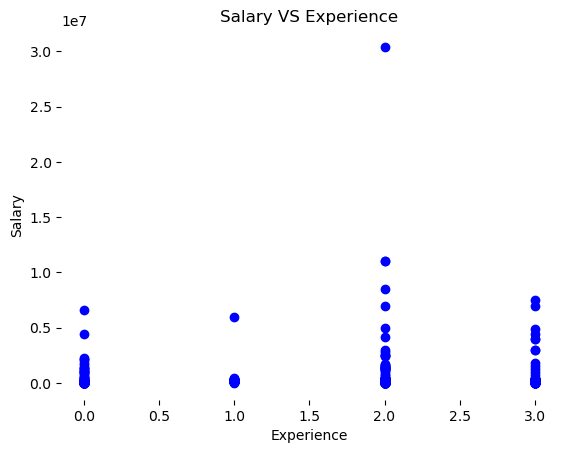

In [104]:
# Prediction on training set (graph)
plt.scatter(dataset['experience_level'],dataset['salary'],color = 'blue')
plt.title('Salary VS Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [106]:
# predicting the salary
y_pred = model.predict(x_test)

In [108]:
# calculating the MAE, RMSE, R2 score
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [110]:
# printing the MAE, RMSE, R2 score values
print(f"MAE value:{mae}")
print(f"RMSE value:{rmse}")
print(f"R2 score{r2}")

MAE value:41932.11655853581
RMSE value:54251.30011056567
R2 score0.25446802226792786


In [112]:
# SVR model
model = SVR()
model.fit(x_train, y_train)

SVR()

In [113]:
# predicting the salary using SVR model
y_pred = model.predict(x_test)

In [116]:
# calculating the MAE, RMSE, R2 score'
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [118]:
# printing the MAE, RMSE, R2 score values
print(f"R2 score:{r2}")
print(f"MAE value:{mae}")
print(f"RMSE value:{rmse}")


R2 score:0.001375300089812681
MAE value:48522.46610774654
RMSE value:62788.21895646857
